# Animal Classification - The Oxford-IIIT Pet Dataset

**Submission deadline: Friday 21 April, 11:55pm**

**Assessment weight: 15% of the total unit assessment.**

**Versions**
  - 2023-03-27 V1.0: Initial release

*Unless a Special Consideration request has been submitted and approved, a 5% penalty (of the total possible mark of the task) will be applied for each day a written report or presentation assessment is not submitted, up until the 7th day (including weekends). After the 7th day, a grade of ‘0’ will be awarded even if the assessment is submitted. The submission time for all uploaded assessments is **11:55 pm**. A 1-hour grace period will be provided to students who experience a technical concern. For any late submission of time-sensitive tasks, such as scheduled tests/exams, performance assessments/presentations, and/or scheduled practical assessments/labs, please apply for [Special Consideration](https://students.mq.edu.au/study/assessment-exams/special-consideration).*

In this assignment you will complete tasks for an end-to-end image classification application. We will train and test the data using the Oxford-III Pet Dataset:

- https://www.robots.ox.ac.uk/~vgg/data/pets/

This is a small dataset with 37 breeds of cats and dogs. Please download the image files and annotations from the above link, and unzip it on your work directory. This will create the following two directories:

- `images` - Images saved as jpg files, one file per image.
- `annotations` - Image annotations for image segmentation, object detection, and image classification. The annotations are explained in the file `annotations/README`. Please read the file so that you understand how to use these annotations. In this assignment, we will only use the annotations for image classification.

# Connect to GitHub Classroom

Please follow these steps to connect:

1. Follow this invitation link and accept the invitation: https://classroom.github.com/a/LuWneNQe
2. The link may ask you to sign in to GitHub (if you haven't signed in earlier). If you don't have a GitHub account, you will need to register.
3. Once you have logged in with GitHub, you may need to select your email address to associate your GitHub account with your email address (if you haven't done it in a previous COMP3420 activity). If you can't find your email address, please skip this step and contact diego.molla-aliod@mq.edu.au so that he can do the association manually.
4. Wait a minute or two, and refresh the browser until it indicates that your assignment repository has been created. Your repository is private to you, and you have administration privileges. Only you and the lecture will have access to it. The repository will be listed under the list of repositories belonging to this offering of COMP3420: https://github.com/orgs/COMP3420-2023S1/repositories
5. In contrast with assignment 1 and the practical sessions, your assignment repository will be empty and will not include starter code. you need to add this Jupyter notebook and commit the changes.

Please use the github repository linked to this GitHub classroom. Make sure that you continuously push commits and you provide useful commit comments. **1 mark of the assessment of this assignment is related to good practice with the use of GitHub.**


## Task 1 (4 marks) - Data preparation and exploration

### 1.1 (1 mark)

The `annotations` directory has the files `trainval.txt` and `test.txt`. Write Python code that counts the number of samples for each of the 37 categories in each of these files. In a MarkDown text cell, answer these questions, providing a justification:

1. Are the data balanced? Comment on whether there are any categories with an unusually large or small number of samples, relative to the other categories.
2. Are there any significant differences in the distribution of categories in `trainval.txt` with respect to `test.txt`?

before we can answer these questions we must understand the data that is available to us, although there is information given on the site when downloading the data it is still ideal to still check as their data pools may change 
so the steps taken is to identify 
* Label identifiers/names
* count how many images per label
* how many images per category of cat or dog


In [1]:
import glob
import os
import collections
import pandas as pd

### Label Identifiers/names

### list for reference to check if my function works and compare if files stored have the same
label_names = ["Abyssinian",
               "american_bulldog",
               "american_pit_bull_terrier",
               "basset_hound",
               "beagle",
               "Bengal",
               "Birman",
               "Bombay",
               "boxer",
               "British_Shorthair",
               "chihuahua",
               "Egyptian_Mau",
               "english_cocker_spaniel",
               "english_setter",
               "german_shorthaired",
               "great_pyrenees",
               "havanese",
               "japanese_chin",
               "keeshond",
               "leonberger",
               "Maine_Coon",
               "miniature_pinscher",
               "newfoundland",
               "Persian",
               "pomeranian",
               "pug",
               "Ragdoll",
               "Russian_Blue",
               "saint_bernard",
               "samoyed",
               "scottish_terrier",
               "shiba_inu",
               "Siamese",
               "Sphynx",
               "staffordshire_bull_terrier",
               "wheaten_terrier",
               "yorkshire_terrier"]

function to find all names rather then hard code

In [2]:
import os

path = "images"

def get_class_names(dir_path):

    class_names = []
    for file_name in os.listdir(dir_path):
        if file_name.endswith('.jpg'):
            class_name = file_name.rsplit('_', 1)[0].rstrip()
            if class_name not in class_names:
                class_names.append(class_name)

    class_names.sort(key=str.lower)
    return class_names


In [3]:
label_Names = get_class_names(path)
print(label_Names)

['Abyssinian', 'american_bulldog', 'american_pit_bull_terrier', 'basset_hound', 'beagle', 'Bengal', 'Birman', 'Bombay', 'boxer', 'British_Shorthair', 'chihuahua', 'Egyptian_Mau', 'english_cocker_spaniel', 'english_setter', 'german_shorthaired', 'great_pyrenees', 'havanese', 'japanese_chin', 'keeshond', 'leonberger', 'Maine_Coon', 'miniature_pinscher', 'newfoundland', 'Persian', 'pomeranian', 'pug', 'Ragdoll', 'Russian_Blue', 'saint_bernard', 'samoyed', 'scottish_terrier', 'shiba_inu', 'Siamese', 'Sphynx', 'staffordshire_bull_terrier', 'wheaten_terrier', 'yorkshire_terrier']


### counting images per label

In [4]:
def count_images_by_classifier(path, list):
    """
    Count the number of images in a directory, grouped by classifier name
    :param path: the path to the directory containing the image files
    :param label_names: a list of label names, where the index of each name corresponds to the label index in the filenames
    :return: a dictionary with the counts of images for each classifier name
    """
    classifiers = collections.defaultdict(int)  # use defaultdict to avoid key errors

    for filepath in glob.glob(os.path.join(path, "*.jpg")):
        filename = os.path.basename(filepath)
        for label in list:
            if label in filename:
                classifiers[label] += 1
                break

    return dict(classifiers)

In [5]:
counts = count_images_by_classifier(path, label_Names)
print(counts)

{'Abyssinian': 200, 'american_bulldog': 200, 'american_pit_bull_terrier': 200, 'basset_hound': 200, 'beagle': 200, 'Bengal': 200, 'Birman': 200, 'Bombay': 200, 'boxer': 200, 'British_Shorthair': 200, 'chihuahua': 200, 'Egyptian_Mau': 200, 'english_cocker_spaniel': 200, 'english_setter': 200, 'german_shorthaired': 200, 'great_pyrenees': 200, 'havanese': 200, 'japanese_chin': 200, 'keeshond': 200, 'leonberger': 200, 'Maine_Coon': 200, 'miniature_pinscher': 200, 'newfoundland': 200, 'Persian': 200, 'pomeranian': 200, 'pug': 200, 'Ragdoll': 200, 'Russian_Blue': 200, 'saint_bernard': 200, 'samoyed': 200, 'scottish_terrier': 199, 'shiba_inu': 200, 'Siamese': 200, 'Sphynx': 200, 'staffordshire_bull_terrier': 191, 'wheaten_terrier': 200, 'yorkshire_terrier': 200}


In [6]:

def create_dataframe(class_dict):
    df = pd.DataFrame(list(class_dict.items()), columns=['Class', 'Count'])
    return df

In [7]:
class_Count = create_dataframe(counts)
print(class_Count)

                         Class  Count
0                   Abyssinian    200
1             american_bulldog    200
2    american_pit_bull_terrier    200
3                 basset_hound    200
4                       beagle    200
5                       Bengal    200
6                       Birman    200
7                       Bombay    200
8                        boxer    200
9            British_Shorthair    200
10                   chihuahua    200
11                Egyptian_Mau    200
12      english_cocker_spaniel    200
13              english_setter    200
14          german_shorthaired    200
15              great_pyrenees    200
16                    havanese    200
17               japanese_chin    200
18                    keeshond    200
19                  leonberger    200
20                  Maine_Coon    200
21          miniature_pinscher    200
22                newfoundland    200
23                     Persian    200
24                  pomeranian    200
25          

## Seperate the classifications into categories cat and dog 

As stated on their website if the label is Captial is classified as a Cat 
if it starts with a lowercase letter is a dog 


In [8]:
def categorize_labels(label_names):
    cat_labels = []
    dog_labels = []
    for label in label_names:
        if label[0].isupper():
            cat_labels.append(label)
        else:
            dog_labels.append(label)
    return cat_labels, dog_labels

In [9]:
cat_labels, dog_labels = categorize_labels(label_Names)
print("Cat Labels:", cat_labels)
print("Dog Labels:", dog_labels)

Cat Labels: ['Abyssinian', 'Bengal', 'Birman', 'Bombay', 'British_Shorthair', 'Egyptian_Mau', 'Maine_Coon', 'Persian', 'Ragdoll', 'Russian_Blue', 'Siamese', 'Sphynx']
Dog Labels: ['american_bulldog', 'american_pit_bull_terrier', 'basset_hound', 'beagle', 'boxer', 'chihuahua', 'english_cocker_spaniel', 'english_setter', 'german_shorthaired', 'great_pyrenees', 'havanese', 'japanese_chin', 'keeshond', 'leonberger', 'miniature_pinscher', 'newfoundland', 'pomeranian', 'pug', 'saint_bernard', 'samoyed', 'scottish_terrier', 'shiba_inu', 'staffordshire_bull_terrier', 'wheaten_terrier', 'yorkshire_terrier']


In [10]:
cat_count = count_images_by_classifier(path, cat_labels)
dog_count = count_images_by_classifier(path, dog_labels)


cat_df = create_dataframe(cat_count)
dog_df = create_dataframe(dog_count)
print("Cats",cat_df)
print("Dogs",dog_df)

Cats                 Class  Count
0          Abyssinian    200
1              Bengal    200
2              Birman    200
3              Bombay    200
4   British_Shorthair    200
5        Egyptian_Mau    200
6          Maine_Coon    200
7             Persian    200
8             Ragdoll    200
9        Russian_Blue    200
10            Siamese    200
11             Sphynx    200
Dogs                          Class  Count
0             american_bulldog    200
1    american_pit_bull_terrier    200
2                 basset_hound    200
3                       beagle    200
4                        boxer    200
5                    chihuahua    200
6       english_cocker_spaniel    200
7               english_setter    200
8           german_shorthaired    200
9               great_pyrenees    200
10                    havanese    200
11               japanese_chin    200
12                    keeshond    200
13                  leonberger    200
14          miniature_pinscher    200
15   

In [11]:
def categorize_total(counts):
    cat_dog_counts = {"cat": 0, "dog": 0}
    for label in counts.keys():
        count = counts[label]
        if label[0].isupper():
            cat_dog_counts["cat"] += count
        else:
            cat_dog_counts["dog"] += count
    return cat_dog_counts

In [12]:
print(categorize_total(counts))

{'cat': 2400, 'dog': 4990}


### interpritation of data found 1.1.1
Although from initial investigation we can see that each classification has an even distribution for each breed of roughly 200 per breed. However it is not ideal when trying to get enough information for categotising between Cats and Dogs as there is around 2400 counts of cats and around 5000 coutns for dogs 


In [13]:

def count_txt_by_classifier(filepath, label_names):
    """
    Count the number of images in a text file, grouped by classifier name
    :param filepath: the path to the text file containing the image filenames
    :param label_names: a list of label names, where the index of each name corresponds to the label index in the filenames
    :return: a dictionary with the counts of images for each classifier name
    """
    classifiers = collections.defaultdict(int)  # use defaultdict to avoid key errors

    with open(filepath, "r") as file:
        for line in file:
            filename = line.strip().split()[0]
            for label in label_names:
                if label in filename:
                    classifiers[label] += 1
                    break

    return dict(classifiers)

In [14]:
trainCount = count_txt_by_classifier('annotations/trainval.txt',label_Names)
print(trainCount)
testCount = count_txt_by_classifier('annotations/test.txt',label_Names)
print(testCount)

{'Abyssinian': 100, 'american_bulldog': 100, 'american_pit_bull_terrier': 100, 'basset_hound': 100, 'beagle': 100, 'Bengal': 100, 'Birman': 100, 'Bombay': 96, 'boxer': 100, 'British_Shorthair': 100, 'chihuahua': 100, 'Egyptian_Mau': 93, 'english_cocker_spaniel': 96, 'english_setter': 100, 'german_shorthaired': 100, 'great_pyrenees': 100, 'havanese': 100, 'japanese_chin': 100, 'keeshond': 100, 'leonberger': 100, 'Maine_Coon': 100, 'miniature_pinscher': 100, 'newfoundland': 96, 'Persian': 100, 'pomeranian': 100, 'pug': 100, 'Ragdoll': 100, 'Russian_Blue': 100, 'saint_bernard': 100, 'samoyed': 100, 'scottish_terrier': 100, 'shiba_inu': 100, 'Siamese': 99, 'Sphynx': 100, 'staffordshire_bull_terrier': 100, 'wheaten_terrier': 100, 'yorkshire_terrier': 100}
{'Abyssinian': 98, 'american_bulldog': 100, 'american_pit_bull_terrier': 100, 'basset_hound': 100, 'beagle': 100, 'Bengal': 100, 'Birman': 100, 'Bombay': 88, 'boxer': 99, 'British_Shorthair': 100, 'chihuahua': 100, 'Egyptian_Mau': 97, 'eng

In [15]:
print("trainval.txt: ",categorize_total(trainCount))
print("test.txt: ",categorize_total(testCount))

trainval.txt:  {'cat': 1188, 'dog': 2492}
test.txt:  {'cat': 1183, 'dog': 2486}


### Interpritation of information for 1.1.2
based on the count of classification names of breed and of the categories of cat's and dog's the spread does seem to be similar enough to have a learning platform 

### 1.2 (1 mark)

Display 10 random images from the "trainval" data and the "test" data.

In [16]:
import os
import random
import pandas as pd
import matplotlib.pyplot as plt

def display_rnd_img(txtName):
    # open the file containing the list of file names
    with open(txtName, 'r') as file:
        # read the file into a list of lines, ignoring lines that start with '#'
        lines = [line.strip() for line in file.readlines() if not line.startswith('#')]
        # randomly select 10 lines from the list
        random_lines = random.sample(lines, 10)
        # get the text file name without the path or extension
        title = os.path.splitext(os.path.basename(txtName))[0]
        # create a list to hold the image data
        img_data = []
        # loop through each randomly selected line
        for line in random_lines:
            # split the line into the filename and any additional information (which we ignore)
            filename = line.split()[0] + '.jpg'
            # check if the file exists
            if os.path.isfile(os.path.join('images', filename)):
                # read the image data and append to the list
                img_data.append(plt.imread(os.path.join('images', filename)))
            else:
                # display an error message if the file does not exist
                print(f"Error: file '{filename}' does not exist.")
        # create a pandas dataframe from the image data
        df = pd.DataFrame({'images': img_data})
        # create a figure and axes
        fig, axes = plt.subplots(nrows=2, ncols=5, figsize=(10, 5))
        # loop through each image in the dataframe and display it on the corresponding subplot
        for idx, image in df.iterrows():
            row_idx = idx // 5
            col_idx = idx % 5
            axes[row_idx, col_idx].imshow(image['images'], cmap='gray')
            axes[row_idx, col_idx].axis('off')
        fig.suptitle(title, fontsize=16)

        plt.show()

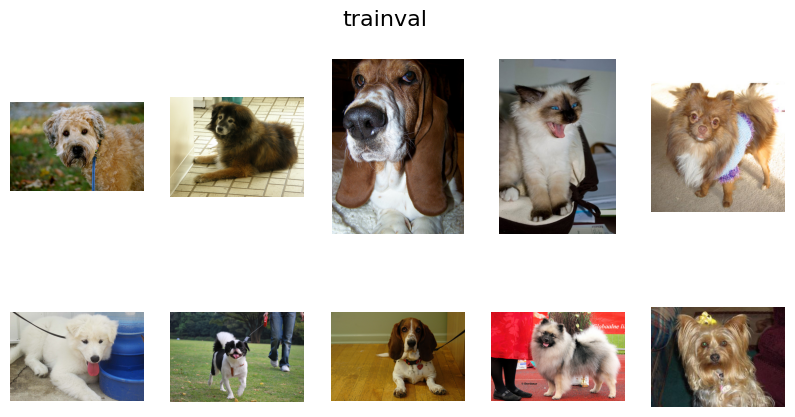

None


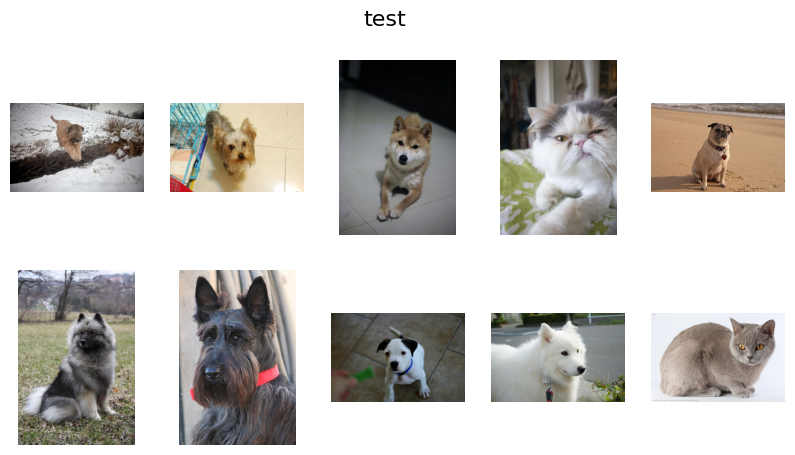

None


In [17]:
print(display_rnd_img('annotations/trainval.txt'))
print(display_rnd_img('annotations/test.txt'))




### 1.3 (1 mark)

Split the `annotations/test.txt` list of files into `validation.txt` and `newtest.txt` so that half of the items in each category falls into `validation.txt`, and the other half into `newtest.txt`. It is up to you how to do the splitting, but make sure that the distribution of categories in each is similar. Show the distribution of category counts on the resulting `validation.txt` and `newtest.txt` to demonstrate that the distribution of category counts is half/half.

To facilitate the next tasks, make sure that the files `validation.txt` and `newtest.txt` contain the full path of the image files relative to the folder where this notebook is located, for example, the first lines of `validation.txt` might be like this:

```
images/Abyssinian_99.jpg 1 1 1
images/Abyssinian_25.jpg 1 1 1
images/Abyssinian_78.jpg 1 1 1
images/Abyssinian_86.jpg 1 1 1
```

Also to facilitate the next tasks of this assignment, write Python code that rewrites the contents of `annotations/trainval.txt` into a new file `training.txt` that also contains the full relative path of the images.

The following are sample files. Your files should look similar to these.
- [`training.txt`](training.txt)
- [`validation.txt`](validation.txt)
- [`newtest.txt`](newtest.txt)

Creating copy of annotations/trainval.txt to training.txt while keeping the directories to the images 
example 
```
Abyssinian_99 1 1 1
Abyssinian_25 1 1 1
Abyssinian_78 1 1 1
Abyssinian_86 1 1 1
```
to

```
images/Abyssinian_99.jpg 1 1 1
images/Abyssinian_25.jpg 1 1 1
images/Abyssinian_78.jpg 1 1 1
images/Abyssinian_86.jpg 1 1 1
```
 

In [18]:
with open('annotations/test.txt', 'r') as f, \
     open('validation.txt', 'w') as val_f, \
     open('newtest.txt', 'w') as new_f:
    
    for i, line in enumerate(f):
        if i % 2 == 0:
            img_path, *labels = line.split()
            img_path = f"images/{img_path}.jpg"
            new_line = f"{img_path} {' '.join(labels)}\n"
            val_f.write(new_line)
        else:
            img_path, *labels = line.split()
            img_path = f"images/{img_path}.jpg"
            new_line = f"{img_path} {' '.join(labels)}\n"
            new_f.write(new_line)

In [19]:
newTestCount = count_txt_by_classifier('newtest.txt',label_Names)
print(newTestCount)
validCount = count_txt_by_classifier('validation.txt',label_Names)
print(validCount)

{'Abyssinian': 49, 'american_bulldog': 50, 'american_pit_bull_terrier': 50, 'basset_hound': 50, 'beagle': 50, 'Bengal': 50, 'Birman': 50, 'Bombay': 44, 'boxer': 49, 'British_Shorthair': 50, 'chihuahua': 50, 'Egyptian_Mau': 49, 'english_cocker_spaniel': 50, 'english_setter': 50, 'german_shorthaired': 50, 'great_pyrenees': 50, 'havanese': 50, 'japanese_chin': 50, 'keeshond': 49, 'leonberger': 50, 'Maine_Coon': 50, 'miniature_pinscher': 50, 'newfoundland': 50, 'Persian': 50, 'pomeranian': 50, 'pug': 50, 'Ragdoll': 50, 'Russian_Blue': 50, 'saint_bernard': 50, 'samoyed': 50, 'scottish_terrier': 50, 'shiba_inu': 50, 'Siamese': 50, 'Sphynx': 50, 'staffordshire_bull_terrier': 44, 'wheaten_terrier': 50, 'yorkshire_terrier': 50}
{'Abyssinian': 49, 'american_bulldog': 50, 'american_pit_bull_terrier': 50, 'basset_hound': 50, 'beagle': 50, 'Bengal': 50, 'Birman': 50, 'Bombay': 44, 'boxer': 50, 'British_Shorthair': 50, 'chihuahua': 50, 'Egyptian_Mau': 48, 'english_cocker_spaniel': 50, 'english_sette

In [20]:
print("newtest.txt: ",categorize_total(newTestCount))
print("validation.txt: ",categorize_total(validCount))

newtest.txt:  {'cat': 592, 'dog': 1242}
validation.txt:  {'cat': 591, 'dog': 1244}


### 1.4 (1 mark)

Use TensorFlow's `TextLineDataset` to generate datasets for training, validation, and test. The datasets need to produce images that are re-sized to dimensions 200x200, and the values of the pixels are normalised to the range [0, 1]. For this task and following tasks in this assignment, use the files we provide:

- [`training.txt`](training.txt)
- [`validation.txt`](validation.txt)
- [`newtest.txt`](newtest.txt)

In [68]:
import tensorflow as tf
import numpy as np

# Define some constants
IMG_HEIGHT = 200
IMG_WIDTH = 200
NUM_CLASSES = 37

# varify for reference labels and their names 
print("labels: ",label_Names)
print("cat labels: ",cat_labels )
print("dog labels: ",dog_labels )

labels:  ['Abyssinian', 'american_bulldog', 'american_pit_bull_terrier', 'basset_hound', 'beagle', 'Bengal', 'Birman', 'Bombay', 'boxer', 'British_Shorthair', 'chihuahua', 'Egyptian_Mau', 'english_cocker_spaniel', 'english_setter', 'german_shorthaired', 'great_pyrenees', 'havanese', 'japanese_chin', 'keeshond', 'leonberger', 'Maine_Coon', 'miniature_pinscher', 'newfoundland', 'Persian', 'pomeranian', 'pug', 'Ragdoll', 'Russian_Blue', 'saint_bernard', 'samoyed', 'scottish_terrier', 'shiba_inu', 'Siamese', 'Sphynx', 'staffordshire_bull_terrier', 'wheaten_terrier', 'yorkshire_terrier']
cat labels:  ['Abyssinian', 'Bengal', 'Birman', 'Bombay', 'British_Shorthair', 'Egyptian_Mau', 'Maine_Coon', 'Persian', 'Ragdoll', 'Russian_Blue', 'Siamese', 'Sphynx']
dog labels:  ['american_bulldog', 'american_pit_bull_terrier', 'basset_hound', 'beagle', 'boxer', 'chihuahua', 'english_cocker_spaniel', 'english_setter', 'german_shorthaired', 'great_pyrenees', 'havanese', 'japanese_chin', 'keeshond', 'leonb

In [83]:
# Load the dataset from the text file
def load_dataset(filepath):
    dataset = tf.data.TextLineDataset(filepath)
    return dataset

"""
 example of how the information is stored in the .txt file 
 images/Abyssinian_205.jpg 1 1 1
 images/american_bulldog_20.jpg 2 2 1
 how the labels are broken down after image path
 Image CLASS-ID SPECIES BREED-ID
 CLASS-ID: 1:37 Class ids (index for label_Names list)
 SPECIES: 1:Cat 2:Dog 
 BREED-ID: 1-25:Dog 1:12:Cat (index for dog_Labels and cat_Labels)
 Breed-ID was wrong way around in list.txt file outliers
"""

# Parse each line of the dataset
def parse_line(line):
    # Split the line into its components
    split_line = tf.strings.split(line, ' ')
    image_path = split_line[0]
    class_id = tf.strings.to_number(split_line[1], tf.int32) - 1  # Subtract 1 to get 0-based indexing
    species = tf.strings.to_number(split_line[2], tf.int32) - 1  # Subtract 1 to get 0-based indexing
    breed_id = tf.strings.to_number(split_line[3], tf.int32) - 1  # Subtract 1 to get 0-based indexing

    # Load and preprocess the image
    image = tf.io.read_file(image_path)
    image = tf.image.decode_jpeg(image, channels=3)
    image = tf.image.resize(image, [IMG_HEIGHT, IMG_WIDTH])
    image = tf.cast(image, tf.float32) / 255.0

    # Create the label
    label = {
        'class_id': class_id,
        'species': species,
        'breed_id': breed_id
    }

    return image, label

# Process the dataset
def process_dataset(dataset):
    dataset = dataset.map(parse_line)
    return dataset

# Load the training, validation, and test datasets
train_dataset = process_dataset(load_dataset('training.txt'))
val_dataset = process_dataset(load_dataset('validation.txt'))
test_dataset = process_dataset(load_dataset('newtest.txt'))

# Print some information about the datasets
train_size = 0
for _ in train_dataset:
    train_size += 1
print('Train dataset size:', train_size)

Train dataset size: 3680


## Task 2 (4 marks) - A simple classifier

Implement a simple classifier that uses these layers. You need to decide a reasonable ordering of the layers, and reasonable values of the various parameters in each layer.

- Dense layers.
- Dropout.
- Final classification.

The task will be composed of the following subtasks.

### 2.1 (2 marks)

Create a simple model that just contains the following two layers:

- A `Flatten` layer.
- The output layer with the correct size and activation function.

Then, train the model with the training data. Use the validation data to determine when to stop training. Determine whether the system is overfitting and at what point in the training stage (if it is overfitting).

Finally, test the trained model on the test data and report the accuracy results.

Do not worry if you see error messages of the form "corrupt JPEG data". The reason for this is that some of the images are not in the JPEG format. Feel free to remove these images (a web search will help you find the images from this set that do not have the correct JPEG format), or just ignore the errors.

Also, you will probably obtain a very low accuracy, don't worry about that. Later you will try to improve it.

In [84]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense

In [85]:
model = Sequential([
    Flatten(input_shape=(IMG_HEIGHT, IMG_WIDTH, 3)),
    Dense(37, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
model.summary()


Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_7 (Flatten)         (None, 120000)            0         
                                                                 
 dense_7 (Dense)             (None, 37)                4440037   
                                                                 
Total params: 4,440,037
Trainable params: 4,440,037
Non-trainable params: 0
_________________________________________________________________


In [86]:
history = model.fit(train_dataset,validation_data=val_dataset,epochs=10)

Epoch 1/10


ValueError: in user code:

    File "c:\Users\Green\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\engine\training.py", line 1160, in train_function  *
        return step_function(self, iterator)
    File "c:\Users\Green\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\engine\training.py", line 1146, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "c:\Users\Green\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\engine\training.py", line 1135, in run_step  **
        outputs = model.train_step(data)
    File "c:\Users\Green\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\engine\training.py", line 993, in train_step
        y_pred = self(x, training=True)
    File "c:\Users\Green\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\utils\traceback_utils.py", line 70, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "c:\Users\Green\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\engine\input_spec.py", line 295, in assert_input_compatibility
        raise ValueError(

    ValueError: Input 0 of layer "sequential_7" is incompatible with the layer: expected shape=(None, 200, 200, 3), found shape=(200, 200, 3)


In [ ]:

# Define the batch size
BATCH_SIZE = 32

# Shuffle and batch the datasets
train_dataset = train_dataset.shuffle(buffer_size=10000).batch(BATCH_SIZE)
val_dataset = val_dataset.batch(BATCH_SIZE)
test_dataset = test_dataset.batch(BATCH_SIZE)

# Train the model
history = model.fit(train_dataset,
                    epochs=10,
                    validation_data=val_dataset)

# # Evaluate the model on the test data
# test_loss, test_accuracy = model.evaluate(test_dataset)
# print('Test loss:', test_loss)
# print('Test accuracy:', test_accuracy)

### 2.3 (1 mark)

Try a more complex architecture that has an additional hidden layer with dropout. For this more complex architecture, try various values of parameters including the following: 

- Hidden layer size
- Dropout rate
- Learning rate

For this, use `keras-tuner` and run it with a reasonable choice of possible parameters and report on the optimal parameters and final evaluation results.

In a separate Markdown text cell, justify your choice of potential parameters.

Use the best model obtained here to report the evaluation results on the test data.

### 2.4 (1 mark)

Conduct error analysis with the best model that you have obtained from the previous experiments. In particular, answer the following questions.
1. What animal breed is easier to detect?
2. What animal breed is more difficult to detect?
3. Display examples of classification errors.
4. Display examples of correct classifications.

## Task 3 (5 marks) - A more complex classifier

Implement a more complex classifier that incorporates convolutions and max pooling. You need to decide an optimal combination of layers and choice of parameters. The task will be composed of the following subtasks.

### 3.1 (2 marks)

Implement a model that includes a sequence of two `Conv2D`, each one followed with `MaxPooling2D`. Use reasonable numbers for the hyperparameters (number of filters, kernel size, pool size, activation), based on what we have seen in the lectures.

Train the model with the training data and use the validation data to determine when to stop training. Determine whether and when it is overfitting, and report on the evaluation results with the test data.

### 3.2 (1 mark)

Try to improve on the above results by using a more complex architecture of your choice. In your solution, you must design the architecture from scratch (do not use a pre-trained model). Comment on the results. Compare with the best model of task 2.

### 3.3 (1 mark)

Use MobileNet, pre-trained on imagenet as discussed in the lectures. Add the correct classification layer, and train it with your data. During training, make sure that you freeze the pre-trained weights. Make sure that you use a reasonable schedule for the learning rate. Evaluate and compare with other systems.

### 3.4 (1 mark)

Add a data augmentation stage to the model implemented in 3.3 and compare results vs. 3.3. In a Markdown text cell, justify the choice of data augmentation layers and their parameters.

# Coding (1 mark)

This mark will be assigned to submissions that have clean and efficient code and good in-code documentation of all code presented in this assignment.

# GitHub Classroom (1 mark)

These marks will be given to submissions that:

- Have continuously committed changes to the GitHub repository at GitHub Classroom.
- The commit messages are useful and informative.


# Submission

Your submission should consist of this Jupyter notebook with all your code and explanations inserted into the notebook as text cells. **The notebook should contain the output of the runs. All code should run. Code with syntax errors or code without output will not be assessed.**

**Do not submit multiple files. If you feel you need to submit multiple files, please contact Diego.Molla-Aliod@mq.edu.au first.**

Examine the text cells of this notebook so that you can have an idea of how to format text for good visual impact. You can also read this useful [guide to the MarkDown notation](https://daringfireball.net/projects/markdown/syntax), which explains the format of the text cells.

Each task specifies a number of marks. The final mark of the assignment is the sum of all the marks of each individual task.

By submitting this assignment you are acknowledging that this is your own work. Any submissions that break the code of academic honesty will be penalised as per [the academic integrity policy](https://policies.mq.edu.au/document/view.php?id=3).

## A note on the use of AI code generators

In this assignment, we view AI code generators such as copilot, CodeGPT, etc as tools that can help you write code quickly. You are allowed to use these tools. If you choose to use them, make the following explicit:
- What part of your code is based on the output of such tools, 
- What tools you used,
- What prompts you used to generate the code, and
- What modifications you made on the generated code.

This will help us assess your work fairly.